# Inho Kim - APM466 Assignment 1

### Question 4a - Calculating bonds' yield (ytm)

In [1]:
# Imports
import numpy as np
from numpy import linalg as linalg
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sympy import *
import math

In [2]:
# Function to calculate year differences
def calc_year_difference(date_start, date_end):
  date_start = datetime.strptime(date_start, '%Y-%m-%d').date()
  date_end = datetime.strptime(date_end, '%Y-%m-%d').date()
  difference = round((date_end - date_start).days / 360,3)
  return difference

1.161


In [3]:
# Bond data initialization
# Bond data here: https://docs.google.com/spreadsheets/d/1FUB_0FK3L6lj1kYwb8fMgKYZGpufswcEq31KiMqI5V8/edit?usp=sharing

bond_data_list = [['CA135087J546', 4.97, 2.25, '2018-10-05', '2024-03-01', 'CAN 2.25 Mar 1 2024', [99.63, 99.64, 99.65, 99.661, 99.67, 99.687, 99.68, 99.683, 99.708, 99.72]],
                  ['CA135087J967', 4.86, 1.50, '2019-05-04', '2024-09-01', 'CAN 1.50 Sep 1 2024', [97.96, 97.985, 97.982, 97.982, 98.021, 98.054, 97.974, 97.975, 97.999, 98.007]],
                  ['CA135087K528', 4.61, 1.25, '2019-11-10', '2025-03-01', 'CAN 1.25 Mar 1 2025', [96.46, 96.482, 96.552, 96.576, 96.661, 96.715, 96.54, 96.448, 96.495, 96.46]],
                  ['CA135087K940', 4.33, 0.50, '2020-03-04', '2025-09-01', 'CAN 0.50 Sep 1 2025', [94.34, 94.37, 94.38, 94.43, 94.49, 94.49, 94.42, 94.25, 94.24, 94.22]],
                  ['CA135087L518', 4.01, 0.25, '2020-09-10', '2026-03-01', 'CAN 0.25 Mar 1 2026', [92.862, 92.86, 92.844, 92.856, 93.023, 93.008, 92.796, 92.57, 92.546, 92.545]],
                  ['CA135087L930', 3.87, 1.00, '2021-04-16', '2026-09-01', 'CAN 1.00 Sep 1 2026', [93.46, 93.44, 93.55, 93.53, 93.6, 93.57, 93.4, 93.12, 93.08, 93.07]],
                  ['CA135087M847', 3.74, 1.25, '2021-10-15', '2027-03-01', 'CAN 1.25 Mar 1 2027', [93.282, 93.301, 93.245, 93.186, 93.467, 93.493, 93.141, 92.856, 92.753, 92.764]],
                  ['CA135087N837', 3.67, 2.75, '2022-05-13', '2027-09-01', 'CAN 2.75 Sep 1 2027', [97.58, 97.591, 97.603, 97.52, 97.74, 97.772, 97.441, 97.092, 96.956, 96.947]],
                  ['CA135087P576', 3.59, 3.50, '2022-10-21', '2028-03-01', 'CAN 3.50 Mar 1 2028', [100.5, 100.48, 100.439, 100.328, 100.637, 100.673, 100.22, 99.834, 99.662, 99.623]],
                  ['CA135087Q491', 3.53, 3.25, '2023-04-21', '2028-09-01', 'CAN 3.25 Sep 1 2028', [99.74, 99.72, 99.72, 99.55, 99.88, 99.91, 99.44, 98.99, 98.81, 98.77]]]
bonds_df = pd.DataFrame(bond_data_list, columns=['ISIN', 'Yield', 'Coupon', 'Issue_Date', "Maturity_Date", "Name", "Prices"])
measured_date_list = ['2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19']

bond_data_dates = []
for i in range(10):
    date_object = datetime.strptime(bond_data_list[i][4], '%Y-%m-%d')
    bond_data_date = date_object.strftime('%m/%y')
    bond_data_dates.append(bond_data_date)
bond_data_dates.append('03/29')

def bonds_list_function(index):
    bonds_list = []
    for i in range(10):
        bonds_list.append((bonds_df["Prices"][i][index], bonds_df["Coupon"][i], calc_year_difference(measured_date_list[i], bonds_df["Maturity_Date"][i])))
    return bonds_list

# Create a list with (price, coupon_rate, maturity_date)
master_bonds_list = [] 
for i in range(10):
    master_bonds_list.append(bonds_list_function(i))

In [4]:
def calc_dirty_price(price, coupon_rate, date):
    dirty_price = price + coupon_rate * (183 - (31 - date) - 29) / 365 
    dirty_price = round(dirty_price,3)
    return dirty_price

def calc_ytm_2024_3(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    p = (price + price * coupon_rate / 100 / 2) * exp(-1 * r_n * year_diff)
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2024_9(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    p = (price + price * coupon_rate / 100 / 2) * exp(-1 * r_n * year_diff) + (price * coupon_rate / 100 / 2) * exp(-1 * rate_list[0] * year_diff_list[0])
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2025_3(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 2):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]),3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2025_9(price, coupon_rate, year_diff,date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 3):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]), 3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2026_3(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 4):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]),3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2026_9(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 5):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]),3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2027_3(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate,date)
    coupons = 0
    for i in range(0, 6):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]),3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2027_9(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 7):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]),3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2028_3(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 8):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]),3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

def calc_ytm_2028_9(price, coupon_rate, year_diff, date):
    r_n = Symbol('r_n')
    dirty_price = calc_dirty_price(price, coupon_rate, date)
    coupons = 0
    for i in range(0, 9):
        coupons += round((price * coupon_rate / 100 / 2) * exp(-1 * rate_list[i] * year_diff_list[i]), 3)
    base = round((price + price * coupon_rate / 100 / 2), 3)
    p = base * exp(-1 * r_n * year_diff) + coupons
    r_year = solve(p - dirty_price, r_n)[0]
    r_year = round(r_year, 3)
    return r_year

rate_list_master = []
for i in range(0, 10): # each day
    year_diff_list = []
    rate_list = []
    for j in range(0, 10): # each month
        year_diff_list.append(master_bonds_list[i][j][2])

    if i < 5:
        difference_date = 8
    else:
        difference_date = 10
    rate_list.append(calc_ytm_2024_3(master_bonds_list[i][0][0], master_bonds_list[i][0][1], master_bonds_list[i][0][2], i + difference_date)) 
    rate_list.append(calc_ytm_2024_9(master_bonds_list[i][1][0], master_bonds_list[i][1][1], master_bonds_list[i][1][2], i + difference_date))
    rate_list.append(calc_ytm_2025_3(master_bonds_list[i][2][0], master_bonds_list[i][2][1], master_bonds_list[i][2][2], i + difference_date))
    rate_list.append(calc_ytm_2025_9(master_bonds_list[i][3][0], master_bonds_list[i][3][1], master_bonds_list[i][3][2], i + difference_date))
    rate_list.append(calc_ytm_2026_3(master_bonds_list[i][4][0], master_bonds_list[i][4][1], master_bonds_list[i][4][2], i + difference_date))
    print(rate_list)

    rate_list.append(calc_ytm_2026_9(master_bonds_list[i][5][0], master_bonds_list[i][5][1], master_bonds_list[i][5][2], i + difference_date))
    rate_list.append(calc_ytm_2027_3(master_bonds_list[i][6][0], master_bonds_list[i][6][1], master_bonds_list[i][6][2], i + difference_date))
    rate_list.append(calc_ytm_2027_9(master_bonds_list[i][7][0], master_bonds_list[i][7][1], master_bonds_list[i][7][2], i + difference_date))
    rate_list.append(calc_ytm_2028_3(master_bonds_list[i][8][0], master_bonds_list[i][8][1], master_bonds_list[i][8][2], i + difference_date))
    rate_list.append(calc_ytm_2028_9(master_bonds_list[i][9][0], master_bonds_list[i][9][1], master_bonds_list[i][9][2], i + difference_date))
    rate_list_master.append(rate_list)
ytm_master = rate_list_master

'\nrate_list_master = []\nfor i in range(0, 10): # each day\n    year_diff_list = []\n    rate_list = []\n    for j in range(0, 10): # each month\n        year_diff_list.append(master_bonds_list[i][j][2])\n\n    if i < 5:\n        difference_date = 8\n    else:\n        difference_date = 10\n    rate_list.append(calc_ytm_2024_3(master_bonds_list[i][0][0], master_bonds_list[i][0][1], master_bonds_list[i][0][2], i + difference_date)) \n    rate_list.append(calc_ytm_2024_9(master_bonds_list[i][1][0], master_bonds_list[i][1][1], master_bonds_list[i][1][2], i + difference_date))\n    rate_list.append(calc_ytm_2025_3(master_bonds_list[i][2][0], master_bonds_list[i][2][1], master_bonds_list[i][2][2], i + difference_date))\n    rate_list.append(calc_ytm_2025_9(master_bonds_list[i][3][0], master_bonds_list[i][3][1], master_bonds_list[i][3][2], i + difference_date))\n    rate_list.append(calc_ytm_2026_3(master_bonds_list[i][4][0], master_bonds_list[i][4][1], master_bonds_list[i][4][2], i + diffe

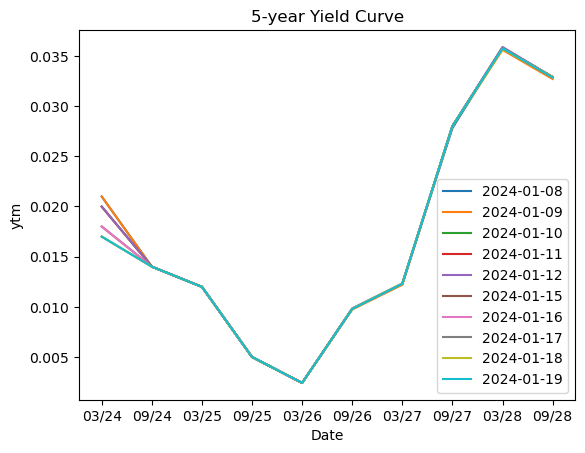

In [181]:
plt.xlabel('Date')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = bond_data_dates)
plt.ylabel('ytm')
plt.title('5-year Yield Curve')

for i in range(10):
    plt.plot(ytm_master[i], label = measured_date_list[i])

plt.legend()
plt.show()

### Question 4b - Calculating Spot Rates

In [21]:
bonds = master_bonds_list[1]
spot_rates = []

def calc_spot(bonds):
    for i, (price, coupon_rate, time_to_mat) in enumerate(sorted(bonds, key=lambda x: x[2])):
        coupons_remaining = int(time_to_mat / 0.5)
        years_to_mat = int(time_to_mat)
        if i == 0:
            spot_rate = ((100 + coupon_rate / 2)/price) - 1
        else:
            coupon_sum = 0
            for j in range(1, i + 1):
                coupon_sum +=  (coupon_rate / 2) / (((1 + spot_rates[j - 1]) ** (j)))
            r_n = Symbol('r_n')
            p = coupon_sum + (coupon_rate + 100) / (1 + r_n)**(1)
            spot_rate = solve(p - price, r_n)[0]
        spot_rates.append(spot_rate)
    return spot_rates

spot_list = []
for i in range(10):
    spot_list.append(calc_spot(master_bonds_list[i]))

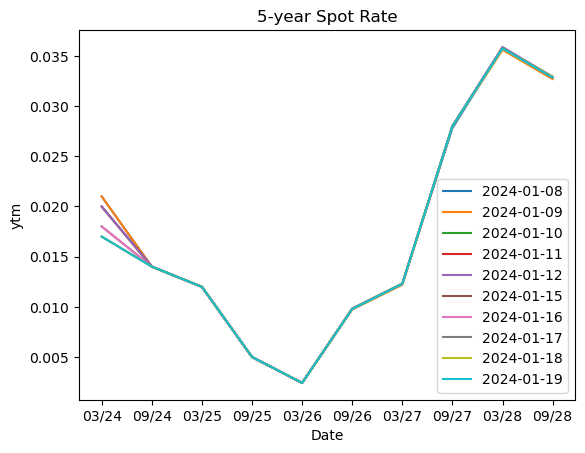

In [182]:
plt.xlabel('Date')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = bond_data_dates)
plt.ylabel('ytm')
plt.title('5-year Spot Rate')

for i in range(10):
    plt.plot(spot_list[i], label = measured_date_list[i])

plt.legend()
plt.show()

### Question 4c - Calculating 1-year Forward Curve

In [188]:
forward_rate = {}
for i in range(0, 10):
    forward_rate_list = []
    t = 1
    for k in range(0, 4):
        t += 1
        forward = (ytm_master[i][2 * k + 2] * j - ytm_master[i][2]) / (t - 1)
        forward_rate_list.append(forward)        
    forward_rate[i] = forward_rate_list

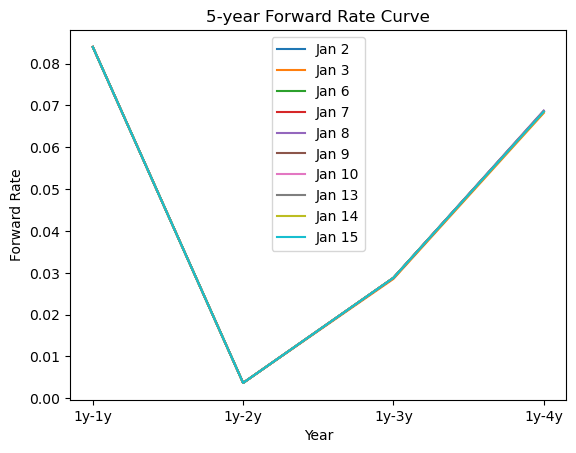

In [189]:
dates = ['Jan 2', 'Jan 3', 'Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15']
plt.xlabel('Year')
plt.xticks(ticks = [0, 1, 2, 3],labels = ['1y-1y','1y-2y','1y-3y','1y-4y'])
plt.ylabel('Forward Rate')
plt.title('5-year Forward Rate Curve')
for i in range(10):
    plt.plot(forward_rate[i], label = dates[i])
plt.legend()
plt.show()

### Question 5 - Calculating Covariance Matrices

In [191]:
ytm_list = []
for i in range(10):
    j = 1
    temp = []
    while (j < len(ytm_master[0])):
        temp.append(ytm_master[i][j])
        j += 2
    ytm_list.append(temp)

ytm_list = np.array(ytm_list).transpose()

log_returns = np.zeros((5, 9))
for i in range(len(ytm_list)):
    for j in range(len(ytm_list[i])-1):
        log_returns[i][j] = math.log(ytm_list[i][j]/ytm_list[i][j+1])

cov_yield = np.cov(log_returns)
print(cov_yield)
print('break')


forward_rate_list = []
for i in range(10):
    j = 0
    temp = []
    while (j < len(forward_rate_dict[0])):
        temp.append(forward_rate_dict[i][j])
        j += 1
    forward_rate_list.append(temp)

forward_rate_list = np.array(forward_rate_list).transpose()

log_returns = np.zeros((4, 9))
for i in range(len(forward_rate_list)):
    for j in range(len(forward_rate_list[i])-1):
        log_returns[i][j] = math.log(forward_rate_list[i][j]/forward_rate_list[i][j+1])

cov_forward = np.cov(log_returns)
print(cov_forward)

[[ 1.06264674e-07  6.87854512e-08  1.23313856e-06 -5.05168394e-07
   9.88225414e-07]
 [ 6.87854512e-08  1.05860425e-07  9.56569359e-07 -7.77451336e-07
   7.23351638e-07]
 [ 1.23313856e-06  9.56569359e-07  1.60676513e-05 -7.02515718e-06
   1.16283623e-05]
 [-5.05168394e-07 -7.77451336e-07 -7.02515718e-06  5.70969349e-06
  -5.31237898e-06]
 [ 9.88225414e-07  7.23351638e-07  1.16283623e-05 -5.31237898e-06
   9.55213960e-06]]
break
[[ 6.89395180e-08 -8.83783458e-08 -1.21030538e-06 -7.65332799e-07]
 [-8.83783458e-08  1.13495148e-07  1.55426974e-06  9.83864687e-07]
 [-1.21030538e-06  1.55426974e-06  2.12850898e-05  1.34736254e-05]
 [-7.65332799e-07  9.83864687e-07  1.34736254e-05  1.20440450e-05]]


### Question 6 - Calculating Eigenvalues and Eigenvectors

In [192]:
ytm_w, ytm_v = linalg.eig(cov_yield)
print("This is ytm_w")
print(ytm_w)
print("This is ytm_v")
print(ytm_v)

forward_w, forward_v = linalg.eig(cov_forward)
print("This is forward_w")
print(forward_w)
print("This is forward_v")
print(forward_v)

This is ytm_w
[2.84833009e-05 2.31976416e-06 7.36105799e-07 2.43864275e-09
 3.15361823e-23]
This is ytm_v
[[-5.82809806e-02  4.51604059e-02 -5.67133011e-02 -9.95664334e-01
   1.40681931e-14]
 [-4.93245218e-02 -1.25543274e-01 -1.20930855e-03 -2.73819173e-03
  -9.90856709e-01]
 [-7.40227588e-01  2.84492342e-01  6.08820697e-01  2.15541996e-02
   3.21339667e-16]
 [ 3.62245054e-01  9.22004482e-01  8.88130338e-03  2.01096002e-02
  -1.34918428e-01]
 [-5.61259350e-01  2.26210667e-01 -7.91227287e-01  8.81819497e-02
  -2.03151654e-15]]
This is forward_w
[ 3.10837478e-05  2.42770261e-06  1.18987343e-10 -3.86003650e-22]
This is forward_v
[[ 4.61371996e-02  3.30685809e-02 -9.98387614e-01  3.57679033e-13]
 [-5.92681366e-02 -4.21195989e-02 -4.13396677e-03 -9.97344543e-01]
 [-8.11652944e-01 -5.76810719e-01 -5.66129878e-02  7.28276205e-02]
 [-5.79291071e-01  8.15120729e-01  2.28386248e-04 -1.62872350e-16]]
